# Class Imbalance

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('data/penguins_simple.csv', sep=';')

<AxesSubplot:>

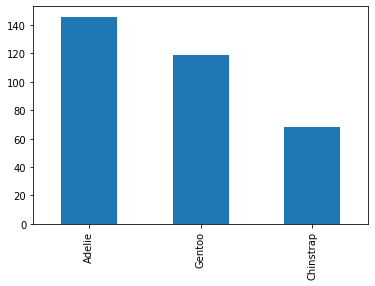

In [3]:
df['Species'].value_counts().plot.bar()

### Sampling Bias

In [4]:
df.groupby('Species')['Culmen Length (mm)'].describe()

,count,mean,std,min,25%,50%,75%,max
Species,,,,,,,,
Adelie,146.0,38.823973,2.662597,32.1,36.725,38.85,40.775,46.0
Chinstrap,68.0,48.833824,3.339256,40.9,46.350,49.55,51.075,58.0
Gentoo,119.0,47.568067,3.106116,40.9,45.350,47.40,49.600,59.6


In [5]:
df[df['Species']=='Chinstrap'].sample(30)['Culmen Length (mm)'].describe()

count    30.000000
mean     49.286667
std       3.436792
min      43.500000
25%      46.400000
50%      49.850000
75%      51.375000
max      58.000000
Name: Culmen Length (mm), dtype: float64

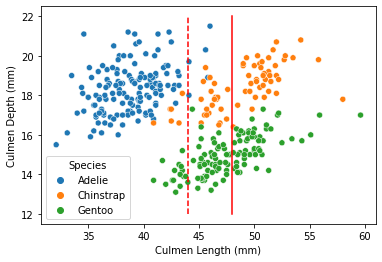

In [6]:
import seaborn as sns
from matplotlib import pyplot as plt

sns.scatterplot(data=df, x='Culmen Length (mm)', y='Culmen Depth (mm)', hue='Species')
plt.plot([48, 48], [12, 22], 'r-')
plt.plot([44, 44], [12, 22], 'r--')

### Undersampling

(usually a bad idea)

In [7]:
chin = df[df['Species']=='Chinstrap']
gent = df[df['Species']=='Gentoo'].sample(68)
adel = df[df['Species']=='Adelie'].sample(68)

In [8]:
df2 = pd.concat([chin,gent,adel])

In [9]:
df2['Species'].value_counts()

Adelie       68
Chinstrap    68
Gentoo       68
Name: Species, dtype: int64

### Class Weights
fixing the problem during the training

In [10]:
from sklearn.linear_model import LogisticRegression

In [11]:
m = LogisticRegression(class_weight='balanced')

In [12]:
X = df[['Culmen Length (mm)']]
y = df['Species']

m.fit(X, y)
m.score(X, y)

0.7147147147147147

## Oversampling

In [13]:
adel = df[df['Species']=='Adelie']
chin1 = df[df['Species']=='Chinstrap']
chin2 = df[df['Species']=='Chinstrap'].sample(78, replace=True)
gent1 = df[df['Species']=='Gentoo']
gent2 = df[df['Species']=='Gentoo'].sample(27)

In [14]:
df3 = pd.concat([chin1, chin2,gent1, gent2,adel])

In [15]:
df3['Species'].value_counts()

Chinstrap    146
Adelie       146
Gentoo       146
Name: Species, dtype: int64

### The imblearn package
(comment: I needed to upgrade scikit version for imblearn to work)

In [16]:
#!pip install imblearn

In [17]:
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler()
X_resampled, y_resampled = ros.fit_resample(X.values, y.values)

In [18]:
X_resampled.shape

(438, 1)

In [21]:
list(y_resampled).count('Gentoo')  # same as the manual resampling above

146